<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore")

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [13]:
df = pd.read_csv("Wholesale_customers_data.csv")
print(df.head())
print(df.info())
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [14]:
df['TotalSpend'] = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].sum(axis=1)
df_sorted = df.sort_values('TotalSpend', ascending=False)
cumulative = df_sorted['TotalSpend'].cumsum() / df_sorted['TotalSpend'].sum()
top_20pct = cumulative.iloc[int(0.2*len(cumulative))]
print("Accumulate expense top 20%:", top_20pct)

Accumulate expense top 20%: 0.43225719073839736


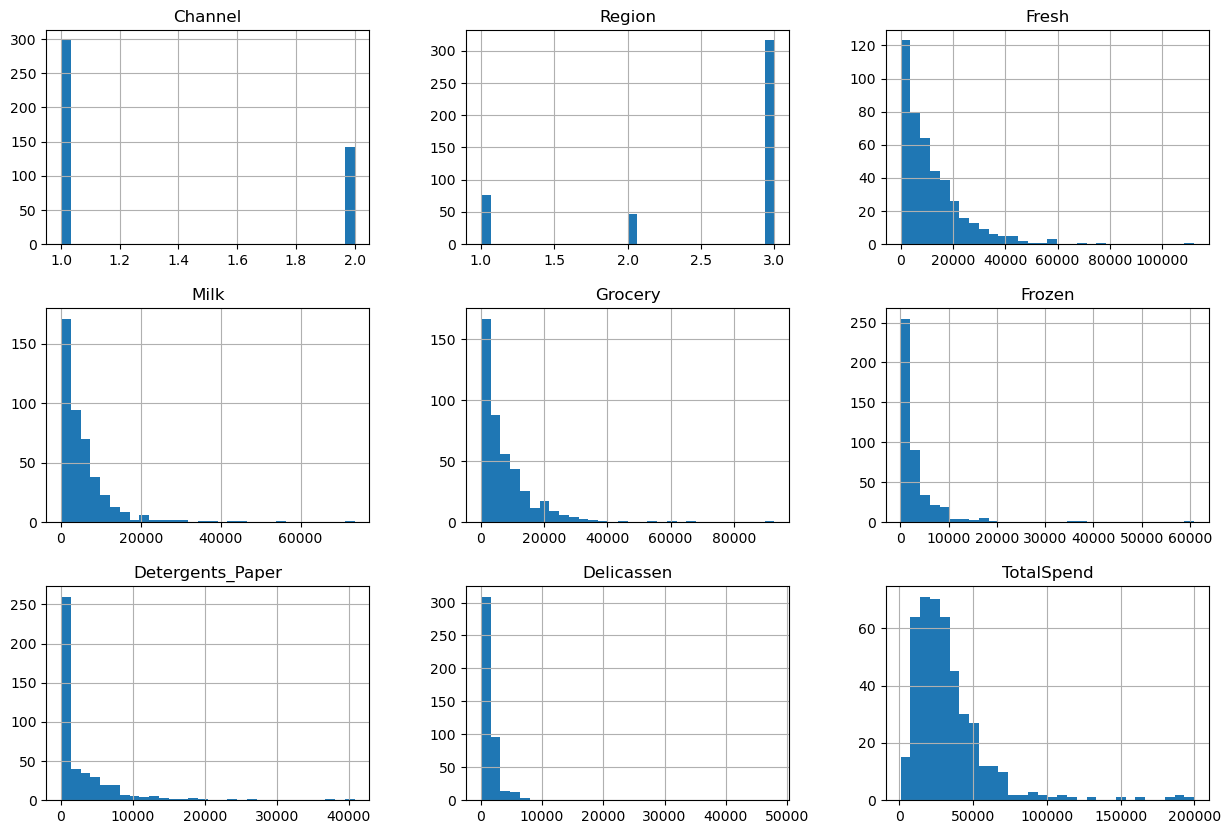

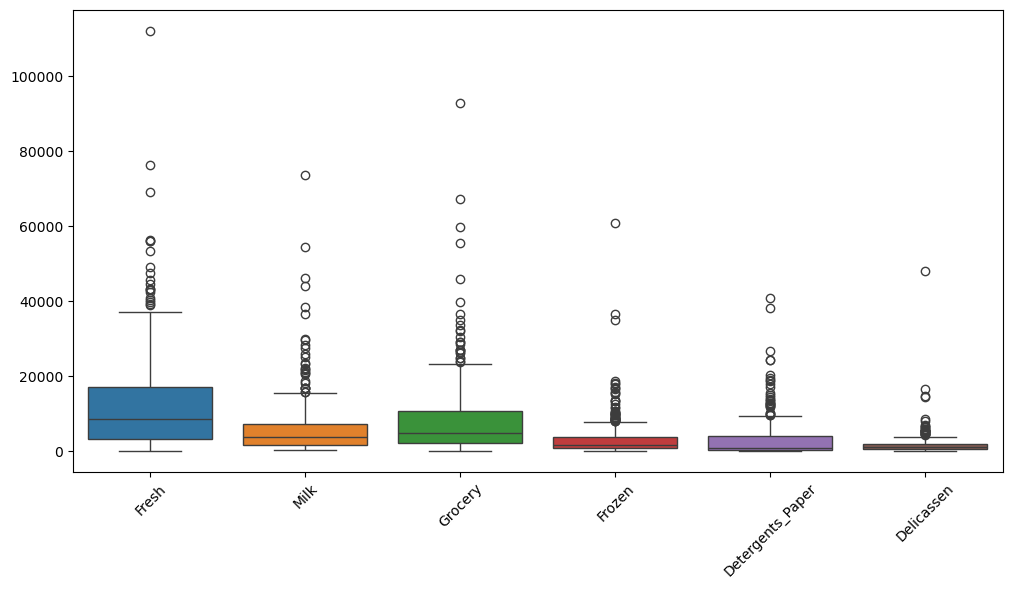

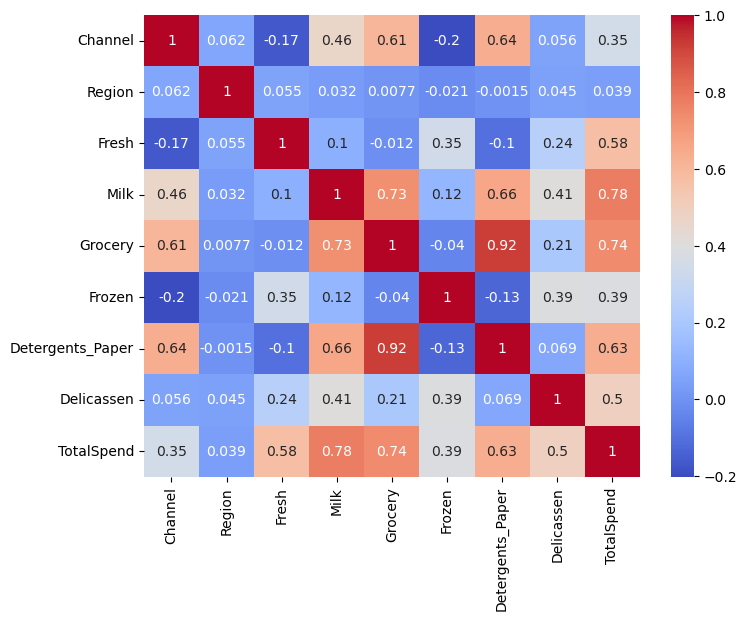

In [15]:
# Visualitazion: Histograms
df.hist(bins=30, figsize=(15,10))
plt.show()

# Boxplots outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])
plt.xticks(rotation=45)
plt.show()

# Matrix correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- Detergents and Grocery are extremely related. You could create corss sale campaings or watch on your inventory with this results form the heatmap.
- People that buy Grocery, don't tend to buy Fresh.
- People that buy  Fresh usually won't buy Detergents.
- The Pareto Principle says that 20% of the clients, generates 43% of the sales.



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [16]:
# No need to clean the data. All indexs are None-null and numeric.

**Your comment here**

-  No need to clean the data. All indexs are None-null and numeric.
-  The data set is ok.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [17]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

X = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

# Sacaler
scaler = StandardScaler()

# Transform data
customers_scale = scaler.fit_transform(X)

# Convert to data frame labels
customers_scale = pd.DataFrame(customers_scale, columns=X.columns)

# Verification
print(customers_scale.head())



      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347


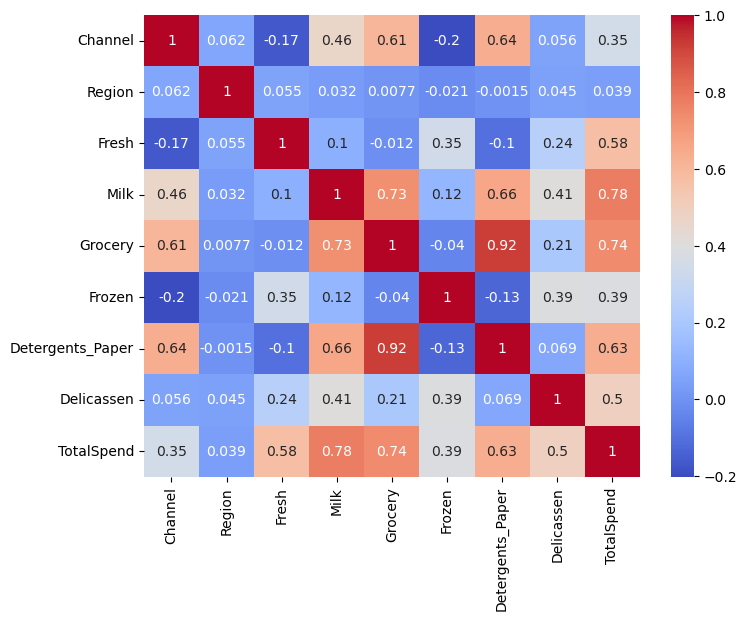

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [26]:
from sklearn.cluster import KMeans

# Your code here:

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(customers_scale)
labels = kmeans.labels_

df['labels'] = labels

print(df.head())



   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  TotalSpend  labels  
0        1338       34112       3  
1        1776       33266       0  
2        7844       36610       0  
3        1788       27381       3  
4        5185       46100       3  


### Looking to the elbow we can choose 2 like the correct number of clusters

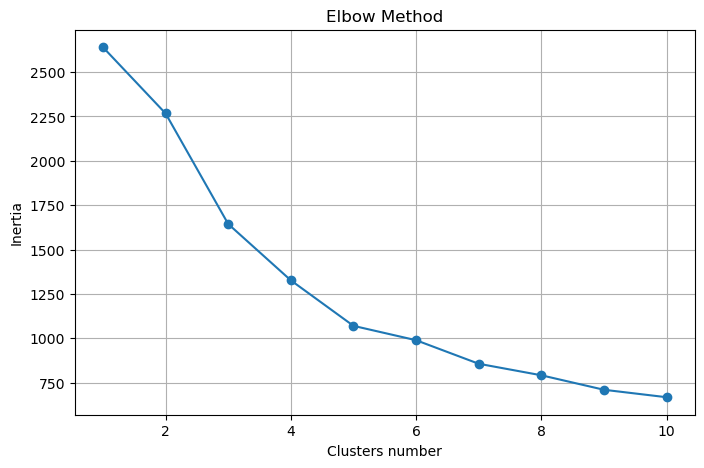

In [28]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_scale)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters number')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(customers_scale)

df['labels'] = kmeans.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,TotalSpend,labels
0,2,3,12669,9656,7561,214,2674,1338,34112,0
1,2,3,7057,9810,9568,1762,3293,1776,33266,0
2,2,3,6353,8808,7684,2405,3516,7844,36610,0
3,1,3,13265,1196,4221,6404,507,1788,27381,0
4,2,3,22615,5410,7198,3915,1777,5185,46100,1


Count the values in `labels`.

In [31]:
df['labels'].value_counts().sort_index()

labels
0    373
1     67
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [33]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)

df['labels_DBSCAN'] = dbscan.labels_



Count the values in `labels_DBSCAN`.

In [35]:
print(df['labels_DBSCAN'].value_counts())


labels_DBSCAN
 0    261
-1    174
 1      5
Name: count, dtype: int64


labels_DBSCAN
 0    261
-1    174
 1      5
Name: count, dtype: int64

Challenge 6 - Compare K-Means with DBSCAN
Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using labels and another using labels_DBSCAN. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

Detergents_Paper as X and Milk as y
Grocery as X and Fresh as y
Frozen as X and Delicassen as y
Visualize Detergents_Paper as X and Milk as y by labels and labels_DBSCAN respectively

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [36]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

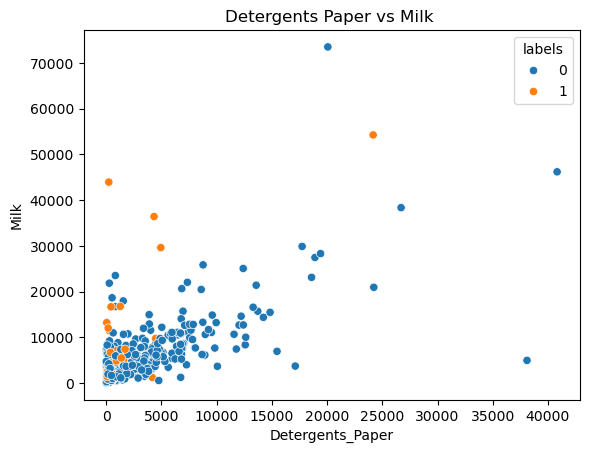

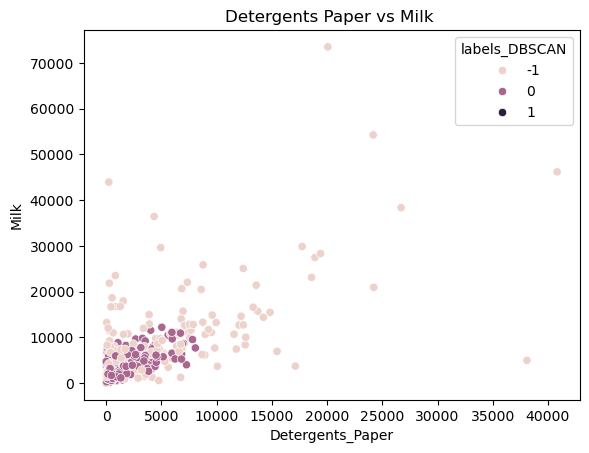

In [37]:
plot(df['Detergents_Paper'], df['Milk'], df['labels'])
plot(df['Detergents_Paper'], df['Milk'], df['labels_DBSCAN'])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

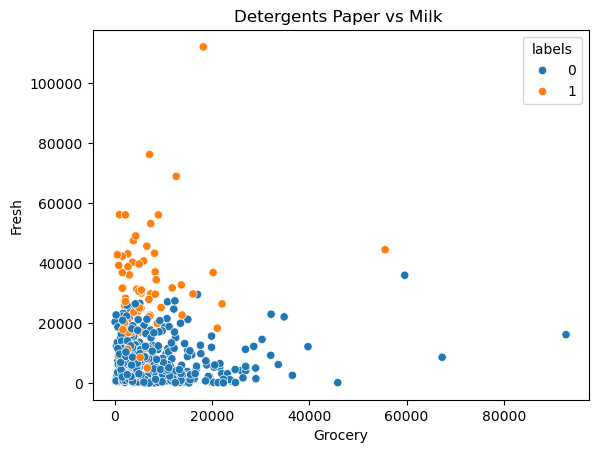

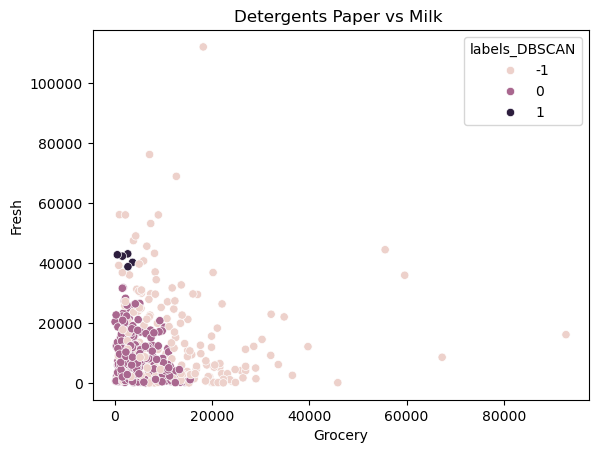

In [38]:
plot(df['Grocery'], df['Fresh'], df['labels'])
plot(df['Grocery'], df['Fresh'], df['labels_DBSCAN'])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

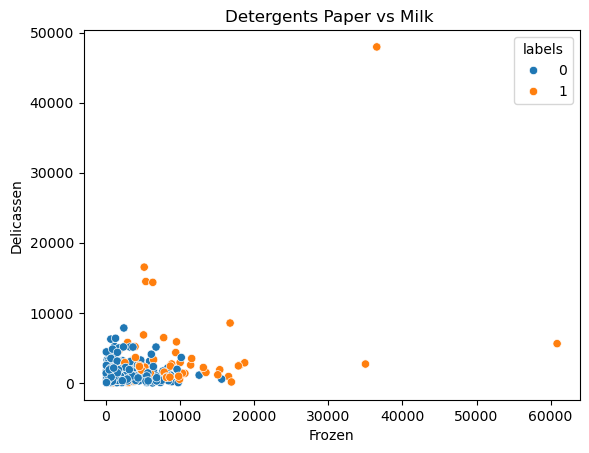

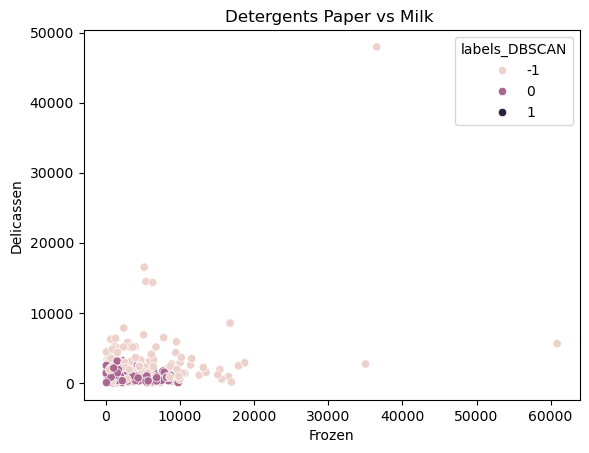

In [39]:
plot(df['Frozen'], df['Delicassen'], df['labels'])
plot(df['Frozen'], df['Delicassen'], df['labels_DBSCAN'])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [41]:
#Kmean
df.groupby('labels').mean()

#DBSCAN mean
df.groupby('labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,TotalSpend,labels
labels_DBSCAN,,,,,,,,,,
-1,1.522989,2.551724,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609,51891.126437,0.310345
0,1.195402,2.528736,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946,20509.118774,0.030651
1,1.000000,3.000000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,47512.800000,1.000000


In [42]:
print("K-Means cluster means:")
display(df.groupby('labels').mean())

print("\nDBSCAN cluster means:")
display(df.groupby('labels_DBSCAN').mean())

K-Means cluster means:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,TotalSpend,labels_DBSCAN
labels,,,,,,,,,,
0,1.356568,2.514745,8290.289544,5652.005362,8172.721180,2034.777480,3170.058981,1171.914209,28491.766756,-0.321716
1,1.134328,2.701493,32654.522388,6599.388060,6718.462687,8845.940299,1275.000000,3489.835821,59583.149254,-0.731343



DBSCAN cluster means:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,TotalSpend,labels
labels_DBSCAN,,,,,,,,,,
-1,1.522989,2.551724,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609,51891.126437,0.310345
0,1.195402,2.528736,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946,20509.118774,0.030651
1,1.000000,3.000000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,47512.800000,1.000000


Which algorithm appears to perform better?

**Your observations here**

- Kmean created 2 clusters but do not detect noise. It only grouped all clients in 2 clusters.
- DBSCAN created 2 cluster also, but separeted the noise in -1. With this information, it's more relaiable for this dataset. 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

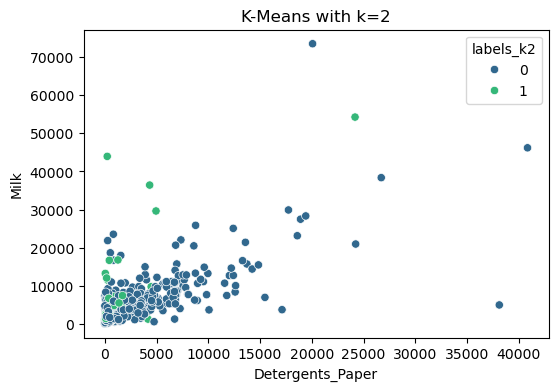

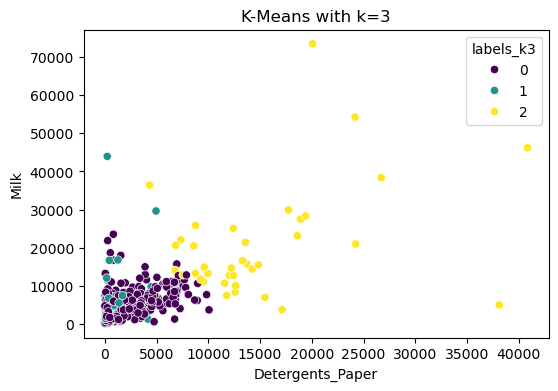

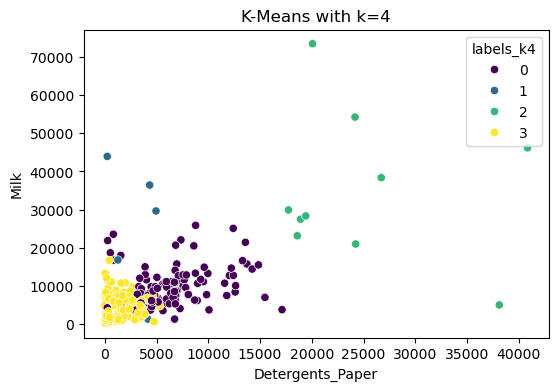

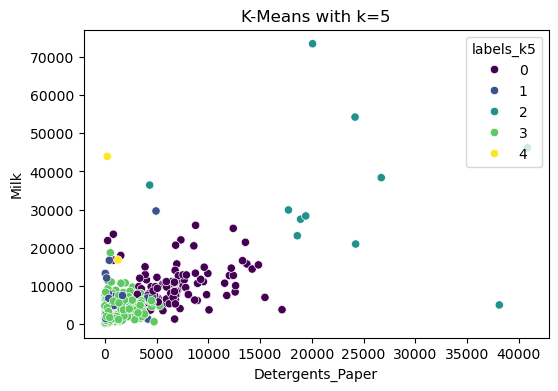

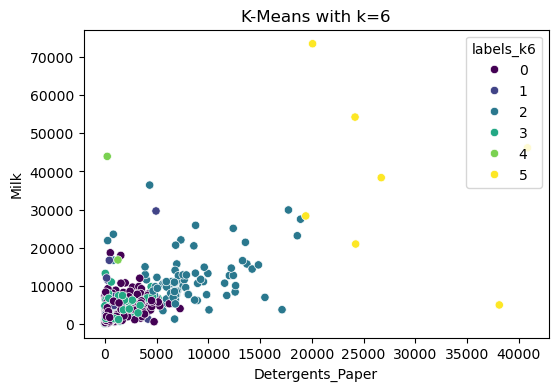

In [43]:
from sklearn.cluster import KMeans

for k in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'labels_k{k}'] = kmeans.fit_predict(customers_scale)

    plt.figure(figsize=(6,4))
    sns.scatterplot(
        x=df['Detergents_Paper'],
        y=df['Milk'],
        hue=df[f'labels_k{k}'],
        palette='viridis'
    )
    plt.title(f'K-Means with k={k}')
    plt.show()

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

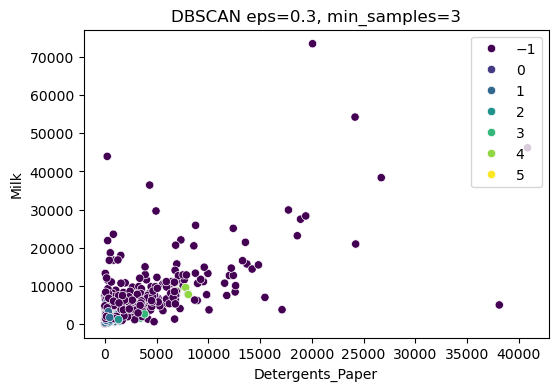

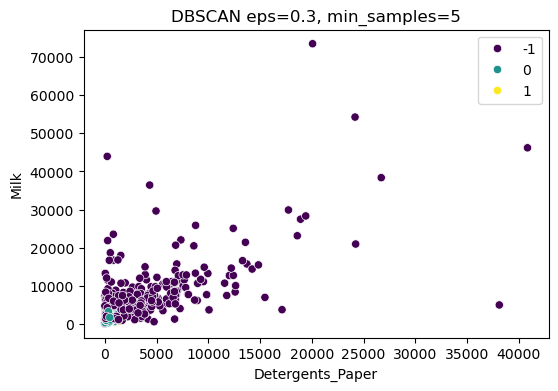

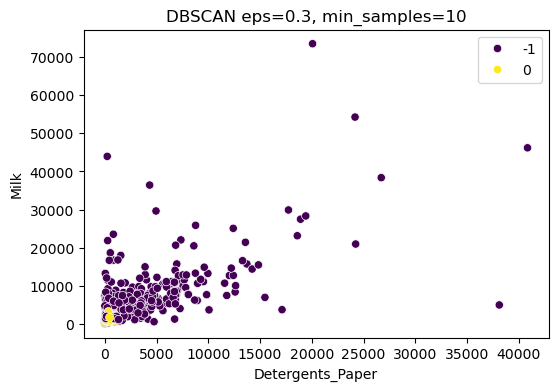

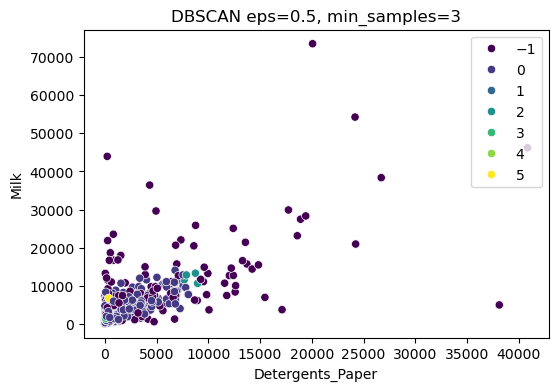

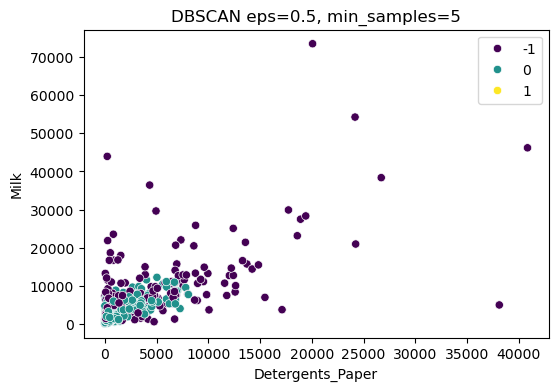

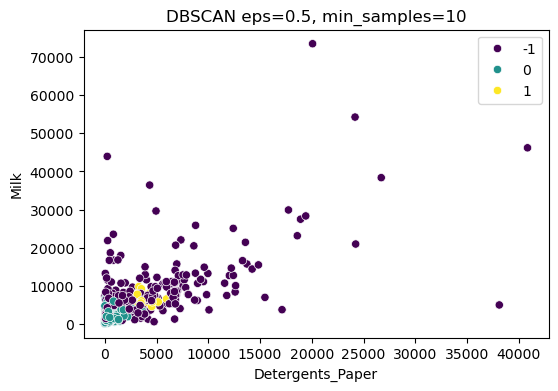

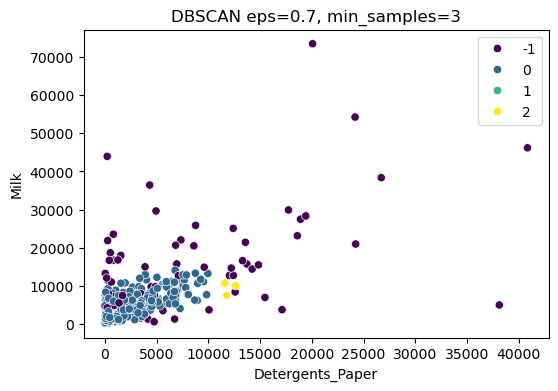

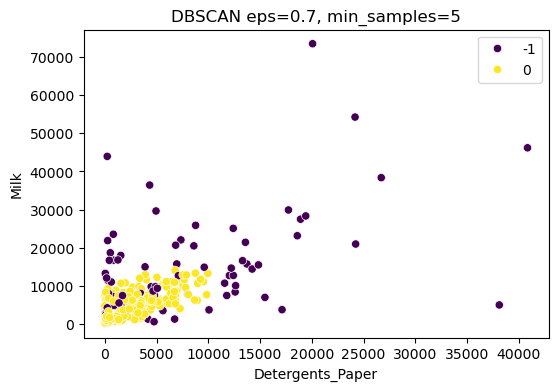

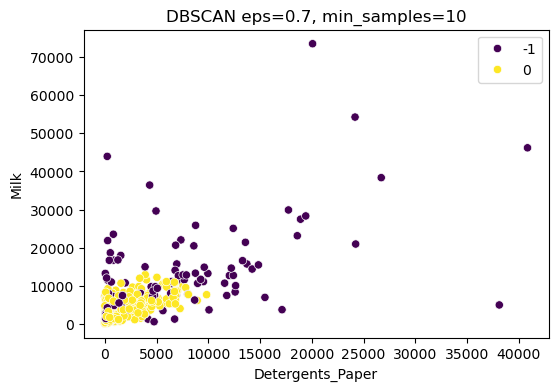

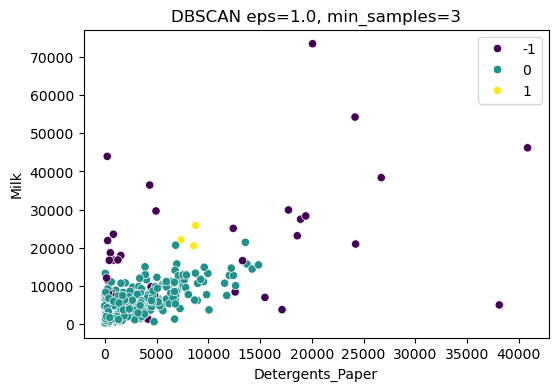

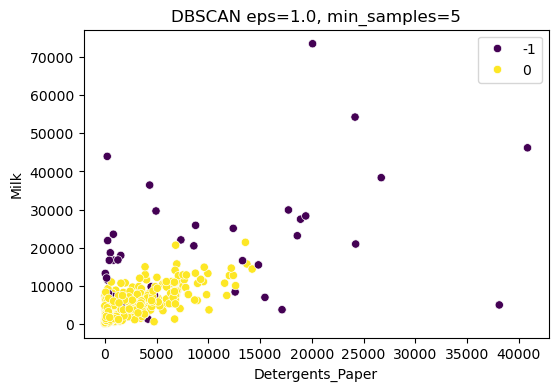

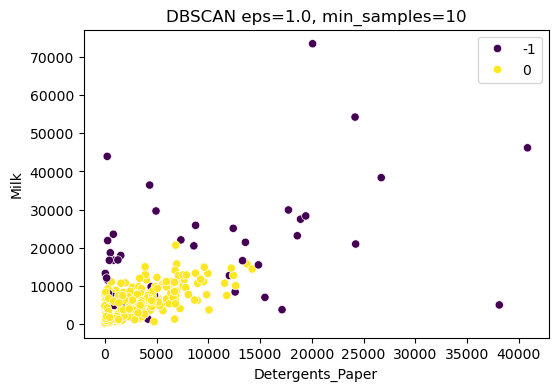

In [44]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(customers_scale)

        plt.figure(figsize=(6,4))
        sns.scatterplot(
            x=df['Detergents_Paper'],
            y=df['Milk'],
            hue=labels,
            palette='viridis'
        )
        plt.title(f'DBSCAN eps={eps}, min_samples={ms}')
        plt.show()

**Your comment here**

- The lower the eps, and the bigger the sample, more noise is shown.
- The eps = 0.7 and the sample = 3, creates more clusters and -1 noise. A more balanced result. 